In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("1980.xlsx")

In [3]:
df

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1980,17930,198,20,3529
1,1980,17410,363,19,3550
2,1980,17284,42,17,3553
3,1980,17955,379,27,3565
4,1980,17099,326,26,3531
...,...,...,...,...,...
1791,1980,18049,139,21,3554
1792,1980,17242,59,40,3534
1793,1980,18036,175,30,3510
1794,1980,17615,266,15,3556


In [4]:
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (1796, 5)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1796 entries, 0 to 1795
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Year                 1796 non-null   int64
 1   Maximum length (m))  1796 non-null   int64
 2   Recession(m),        1796 non-null   int64
 3   Rate/yr(m)           1796 non-null   int64
 4   Snout altitude (m)   1796 non-null   int64
dtypes: int64(5)
memory usage: 70.3 KB


In [6]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


In [7]:
print('Number of unique Model Names: ', len(df['Snout altitude (m)'].unique()))
print('Number  of instances of models: ', len(df))

Number of unique Model Names:  72
Number  of instances of models:  1796


In [8]:
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [9]:
print(numerical)

['Year', 'Maximum length (m))', 'Recession(m),', 'Rate/yr(m)', 'Snout altitude (m)']


In [10]:
df[numerical].head()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
0,1980,17930,198,20,3529
1,1980,17410,363,19,3550
2,1980,17284,42,17,3553
3,1980,17955,379,27,3565
4,1980,17099,326,26,3531


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
Year,NaN,NaN,NaN,NaN,NaN
Maximum length (m)),NaN,1.0000,-0.0073,0.0336,0.0214
"Recession(m),",NaN,-0.0073,1.0000,-0.0366,-0.0005
Rate/yr(m),NaN,0.0336,-0.0366,1.0000,-0.0194
Snout altitude (m),NaN,0.0214,-0.0005,-0.0194,1.0000


In [12]:
corr_matrix['Maximum length (m))'].sort_values(ascending=False)

Maximum length (m))    1.0000
Rate/yr(m)             0.0336
Snout altitude (m)     0.0214
Recession(m),         -0.0073
Year                      NaN
Name: Maximum length (m)), dtype: float64

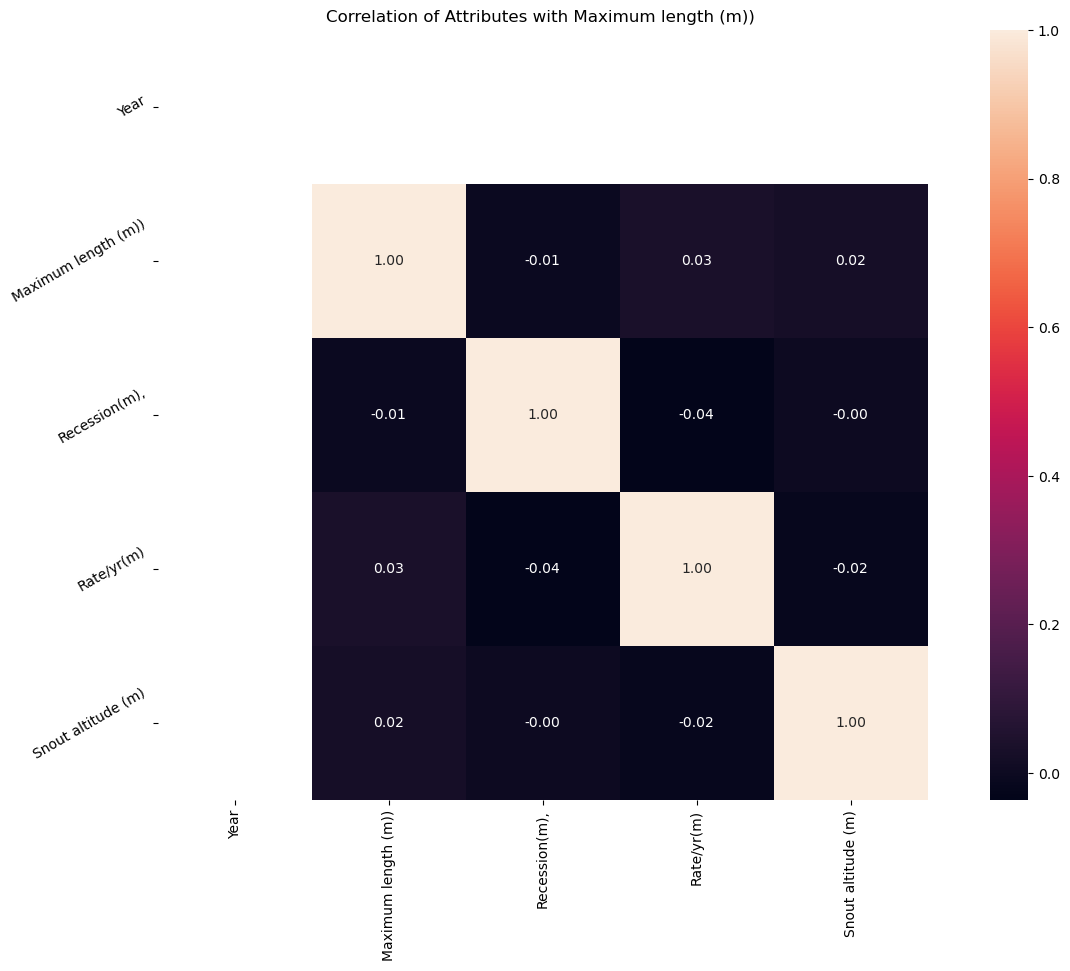

In [13]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Maximum length (m)) ')
a = sns.heatmap(corr_matrix, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

In [14]:
df.isnull().sum()

Year                   0
Maximum length (m))    0
Recession(m),          0
Rate/yr(m)             0
Snout altitude (m)     0
dtype: int64

In [15]:
df.describe()

,Year,Maximum length (m)),"Recession(m),",Rate/yr(m),Snout altitude (m)
count,"1,796.0000","1,796.0000","1,796.0000","1,796.0000","1,796.0000"
mean,"1,980.0000","17,559.9204",222.5290,27.2751,"3,532.1615"
std,0.0000,300.5430,130.8990,8.7086,20.7074
min,"1,980.0000","17,035.0000",0.0000,13.0000,"3,496.0000"
25%,"1,980.0000","17,301.0000",107.7500,20.0000,"3,514.0000"
50%,"1,980.0000","17,551.5000",222.5000,27.0000,"3,532.0000"
75%,"1,980.0000","17,825.2500",342.0000,35.0000,"3,550.0000"
max,"1,980.0000","18,067.0000",440.0000,42.0000,"3,567.0000"


In [16]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    print(df[var].value_counts() / np.float(len(df)))
    print()

Year
1980   1.0000
Name: count, dtype: float64

Recession(m),
191   0.0067
346   0.0061
343   0.0056
2     0.0056
10    0.0056
       ...  
223   0.0006
55    0.0006
28    0.0006
335   0.0006
139   0.0006
Name: count, Length: 433, dtype: float64

Rate/yr(m)
13   0.0401
15   0.0390
27   0.0390
22   0.0390
21   0.0384
24   0.0367
35   0.0362
29   0.0356
38   0.0356
39   0.0356
40   0.0345
33   0.0340
16   0.0334
20   0.0334
26   0.0334
41   0.0329
36   0.0323
14   0.0317
32   0.0317
18   0.0317
34   0.0312
25   0.0312
17   0.0312
19   0.0306
30   0.0301
31   0.0295
42   0.0290
23   0.0290
37   0.0278
28   0.0262
Name: count, dtype: float64

Snout altitude (m)
3511   0.0195
3556   0.0195
3550   0.0189
3532   0.0189
3548   0.0184
        ...  
3501   0.0100
3553   0.0100
3521   0.0089
3523   0.0089
3496   0.0006
Name: count, Length: 72, dtype: float64



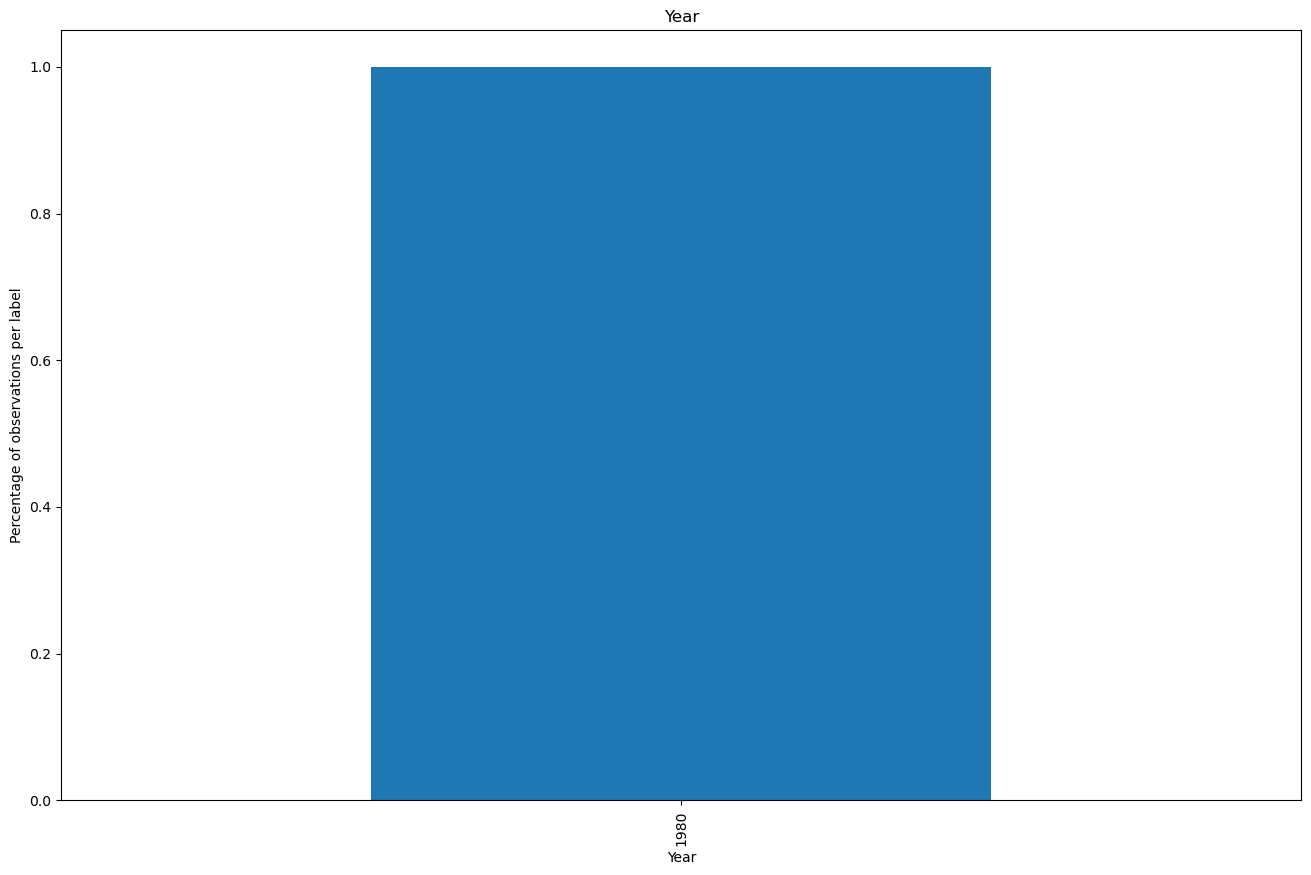

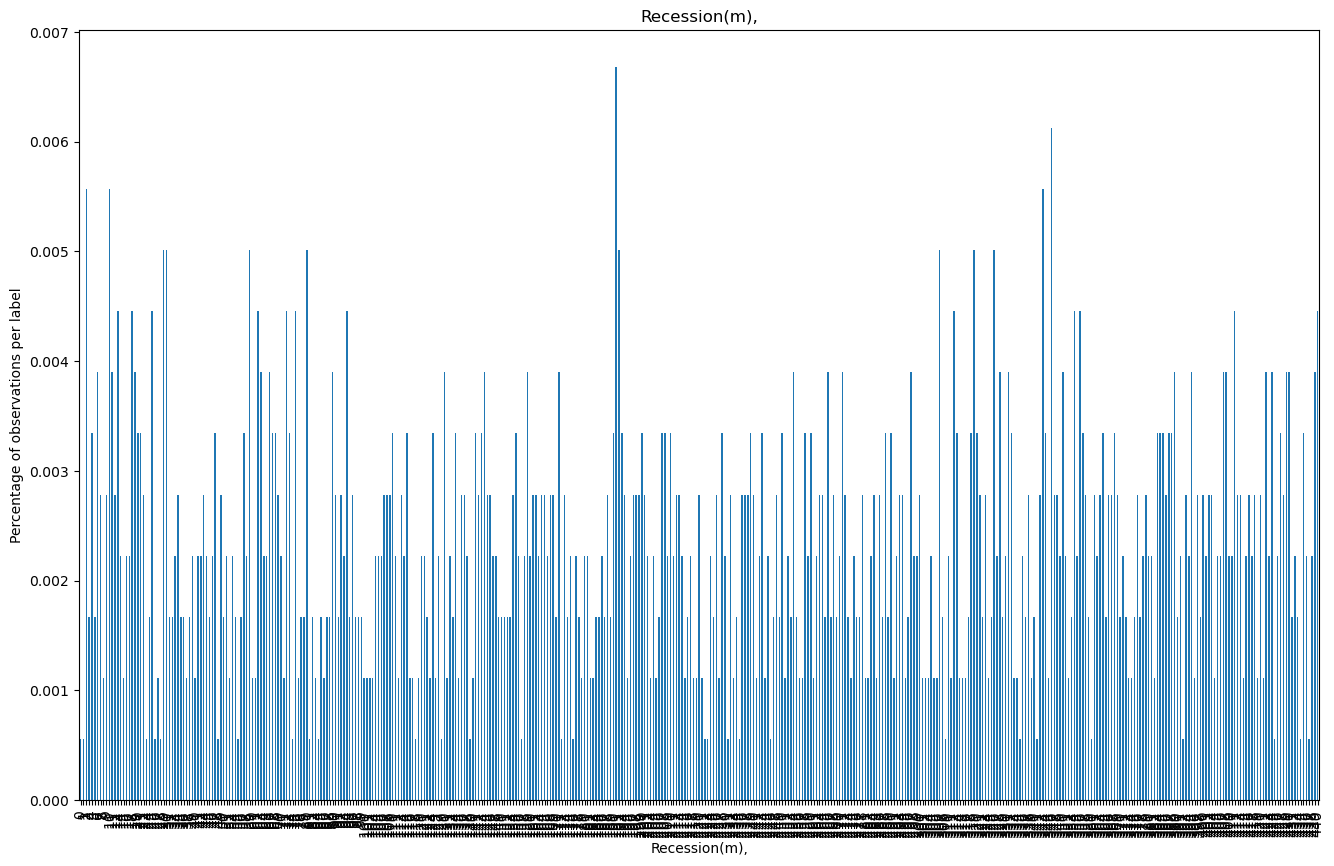

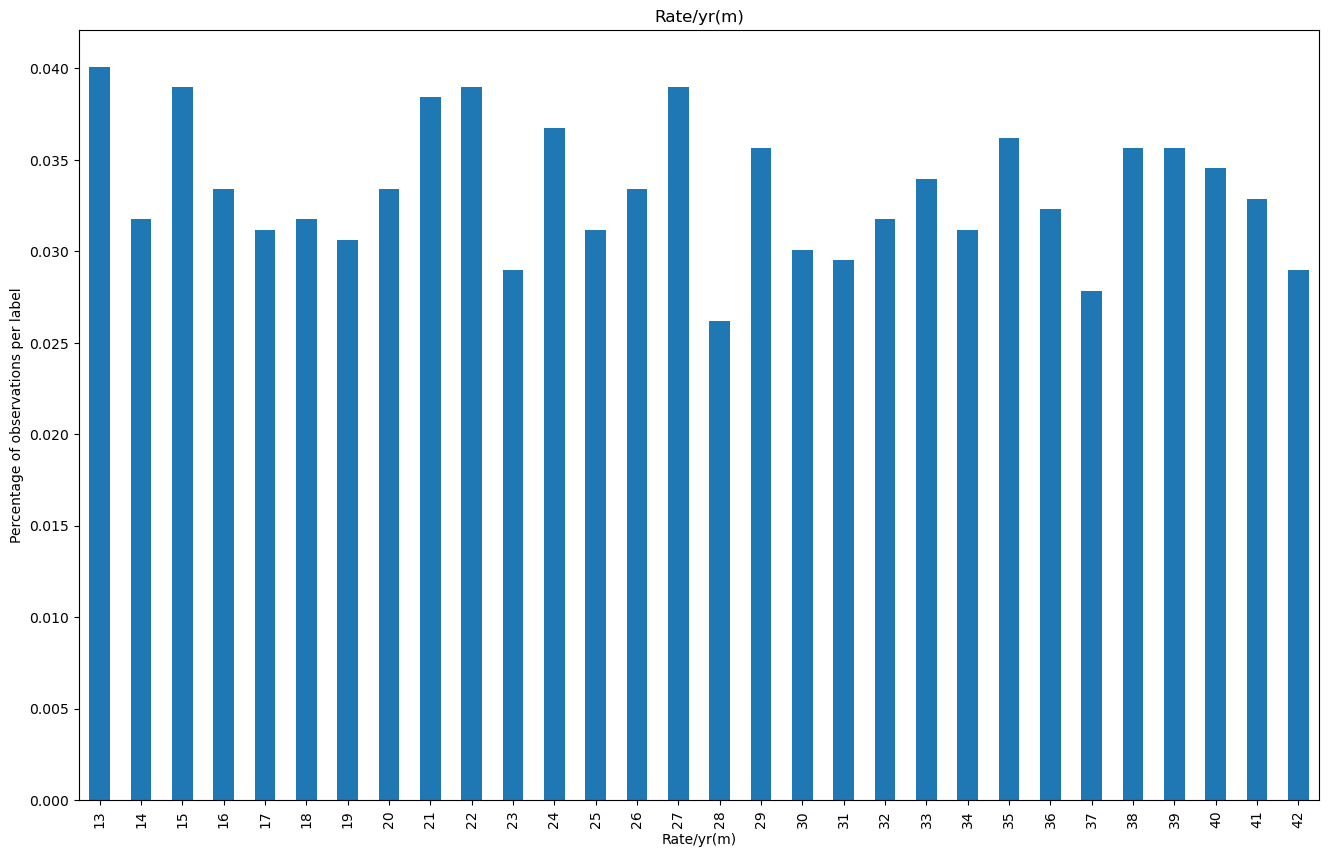

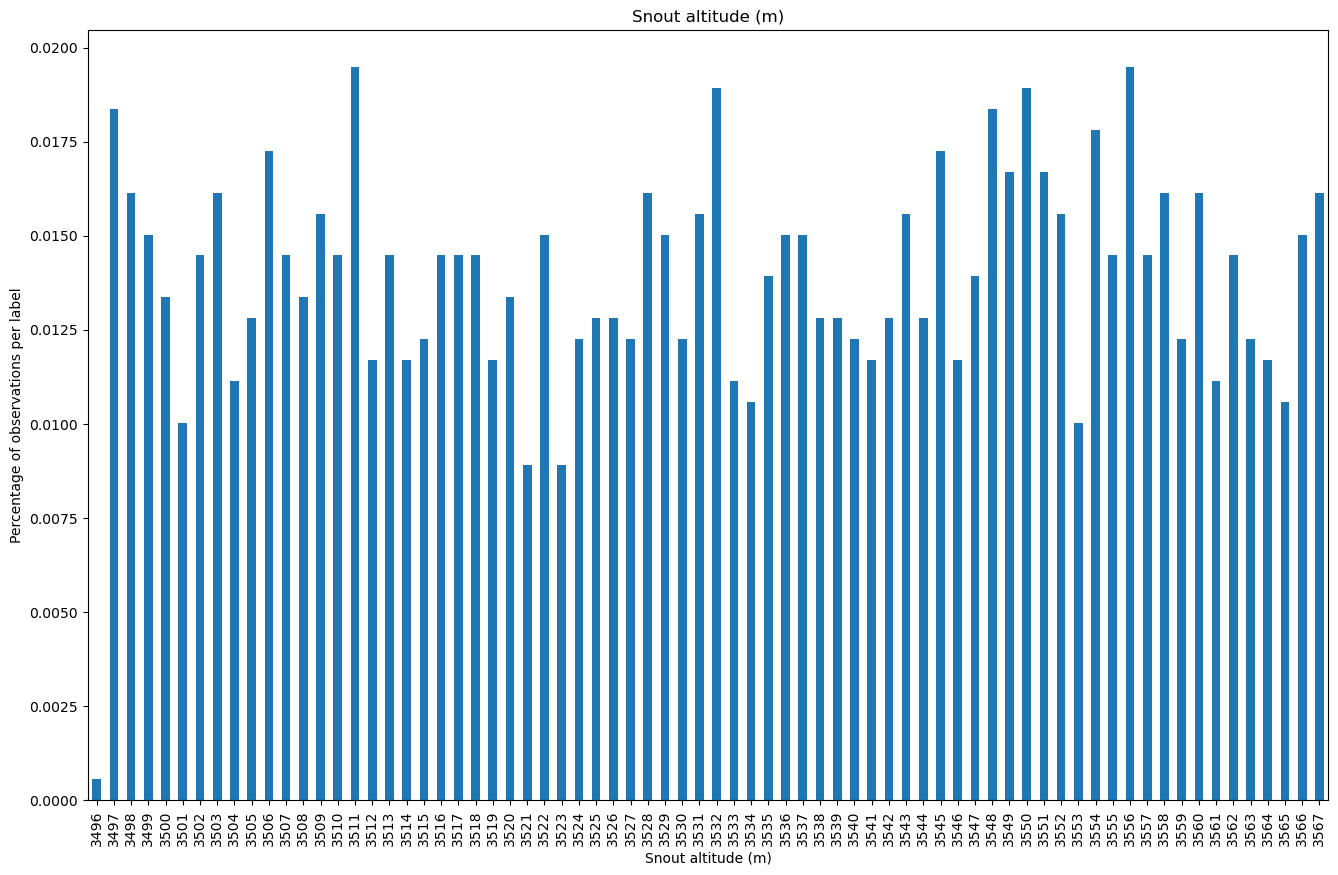

In [17]:
for var in ['Year','Recession(m),','Rate/yr(m)','Snout altitude (m)']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()